DAta load

In [9]:
import os
import zipfile

dataset_url = "https://archive.ics.uci.edu/static/public/908/realwaste.zip"

!wget -O realwaste.zip {dataset_url}

if not os.path.exists("realwaste"):
    os.makedirs("realwaste")

with zipfile.ZipFile("realwaste.zip", "r") as zip_ref:
    zip_ref.extractall("realwaste")

print("Dataset downloaded and extracted successfully!")

dataset_path = "realwaste"
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(os.path.join(root, file))


--2024-12-12 14:06:16--  https://archive.ics.uci.edu/static/public/908/realwaste.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘realwaste.zip’

realwaste.zip           [  <=>               ] 656.65M  89.8MB/s    in 7.9s    

2024-12-12 14:06:24 (83.3 MB/s) - ‘realwaste.zip’ saved [688545323]

Dataset downloaded and extracted successfully!
realwaste/realwaste-main/README.md
realwaste/realwaste-main/RealWaste/Miscellaneous Trash/Miscellaneous Trash_125.jpg
realwaste/realwaste-main/RealWaste/Miscellaneous Trash/Miscellaneous Trash_270.jpg
realwaste/realwaste-main/RealWaste/Miscellaneous Trash/Miscellaneous Trash_84.jpg
realwaste/realwaste-main/RealWaste/Miscellaneous Trash/Miscellaneous Trash_206.jpg
realwaste/realwaste-main/RealWaste/Miscellaneous Trash/Miscellaneous Trash_448.jpg
realwaste/real

In [10]:
import os
import random

dataset_path = r"/content/realwaste/realwaste-main/RealWaste"

# Define classes
classes = ["Cardboard", "Food Organics", "Glass", "Metal", "Miscellaneous Trash", "Paper", "Plastic", "Textile Trash", "Vegetation"]
class_paths = {cls: os.path.join(dataset_path, cls) for cls in classes}
class_paths

{'Cardboard': '/content/realwaste/realwaste-main/RealWaste/Cardboard',
 'Food Organics': '/content/realwaste/realwaste-main/RealWaste/Food Organics',
 'Glass': '/content/realwaste/realwaste-main/RealWaste/Glass',
 'Metal': '/content/realwaste/realwaste-main/RealWaste/Metal',
 'Miscellaneous Trash': '/content/realwaste/realwaste-main/RealWaste/Miscellaneous Trash',
 'Paper': '/content/realwaste/realwaste-main/RealWaste/Paper',
 'Plastic': '/content/realwaste/realwaste-main/RealWaste/Plastic',
 'Textile Trash': '/content/realwaste/realwaste-main/RealWaste/Textile Trash',
 'Vegetation': '/content/realwaste/realwaste-main/RealWaste/Vegetation'}

In [11]:
import pandas as pd
# Function to count files in a folder
def count_files(folder_path):
    file_list = os.listdir(folder_path)
    return len(file_list)

# Create a dictionary with class names and counts
classes_dict = {cls: count_files(class_paths[cls]) for cls in classes}

# Create a DataFrame from the dictionary
classes_df = pd.DataFrame.from_dict(classes_dict, orient='index', columns=['Number of Images'])

# Display the sorted DataFrame
classes_df

,Number of Images
Cardboard,461
Food Organics,411
Glass,420
Metal,790
Miscellaneous Trash,495
Paper,500
Plastic,921
Textile Trash,318
Vegetation,436


#cheak whteher unbalce or not number of data in a class

<Figure size 1000x600 with 0 Axes>

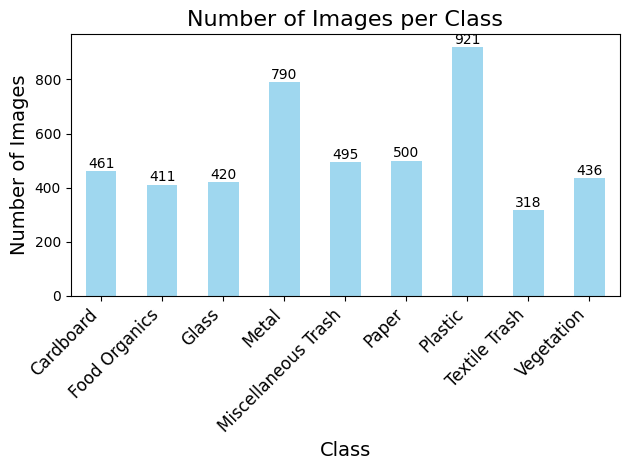

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax= classes_df.plot(
    kind='bar',
    legend=False,
    color='skyblue',
    alpha=0.8
)

plt.title("Number of Images per Class", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
for i, value in enumerate(classes_df['Number of Images']):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [13]:
#create the data frame

# Define path list
path_list = [class_paths[cls] for cls in classes]
image_path = []
class_labels = []
for i, dir_path in enumerate(path_list):
    image_names = os.listdir(dir_path)
    for name_file in image_names:
        full_image_path = os.path.join(dir_path, name_file)
        image_path.append(full_image_path)
        class_labels.append(classes[i])

# Create a dataframe
df = pd.DataFrame({
    "Image_Path": image_path,
    "Class": class_labels
})

df.head()

,Image_Path,Class
0,/content/realwaste/realwaste-main/RealWaste/Ca...,Cardboard
1,/content/realwaste/realwaste-main/RealWaste/Ca...,Cardboard
2,/content/realwaste/realwaste-main/RealWaste/Ca...,Cardboard
3,/content/realwaste/realwaste-main/RealWaste/Ca...,Cardboard
4,/content/realwaste/realwaste-main/RealWaste/Ca...,Cardboard


In [14]:
import cv2
# Function to get image dimensions
def get_image_dimensions(image_path):
    img = cv2.imread(image_path)
    return img.shape[:2]  # Returns (height, width)

# Get dimensions of the first image
first_image_path = df['Image_Path'].iloc[0]
first_image_dimensions = get_image_dimensions(first_image_path)

# Check if all other images have the same dimensions
all_same_size = all(get_image_dimensions(path) == first_image_dimensions for path in df['Image_Path'])

# Print the results
print(f"All images have the same size: {all_same_size}")
print(f"Image dimensions (height x width): {first_image_dimensions[0]} x {first_image_dimensions[1]}")

All images have the same size: True
Image dimensions (height x width): 524 x 524


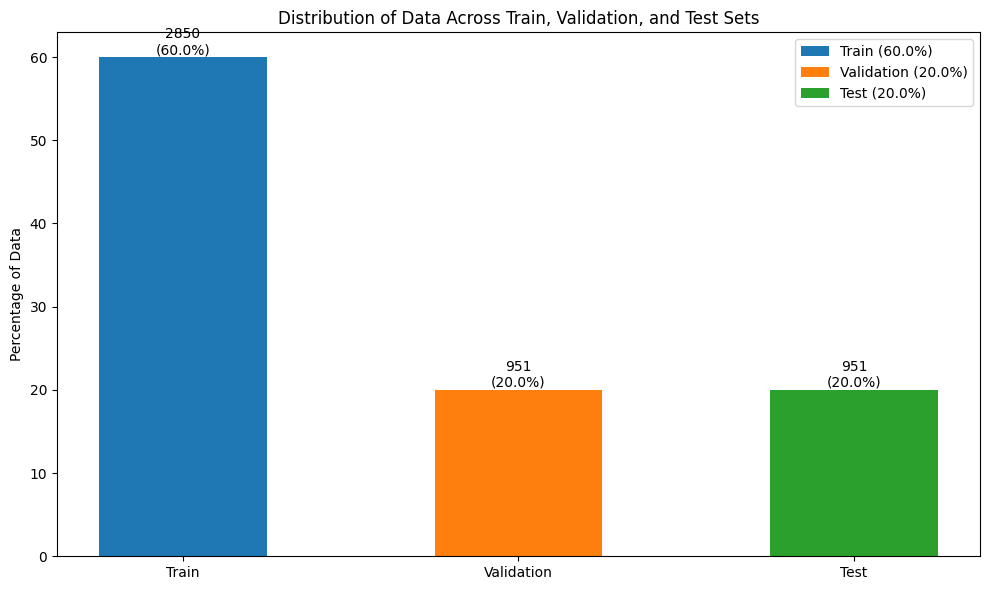

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define ratio
train_ratio = 0.60
val_ratio = 0.20
test_ratio = 0.20

# Split train and test first
df_train_val, df_test = train_test_split(df, test_size=test_ratio, stratify=df['Class'], random_state=42)

# Then split train_val into train and validation
df_train, df_val = train_test_split(df_train_val, test_size=val_ratio/(train_ratio+val_ratio), stratify=df_train_val['Class'], random_state=42)

# Prepare data for visualization
datasets = [df_train, df_val, df_test]
names = ['Train', 'Validation', 'Test']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(names))
total = len(df)
widths = [len(d) / total for d in datasets]

for i, (dataset, name, color) in enumerate(zip(datasets, names, colors)):
    count = len(dataset)
    percentage = count / total * 100
    ax.bar(i, percentage, width=0.5, color=color, label=f'{name} ({percentage:.1f}%)')
    ax.text(i, percentage, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_ylabel('Percentage of Data')
ax.set_title('Distribution of Data Across Train, Validation, and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [17]:
# Define image size and batch size
width = 256
height = 256
image_size = (width, height)

In [ ]:
# Define generator for training 
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Define generator for validation and testing (only rescaling, no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training, validation, and testing sets
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=32,
    # color_mode="rgb",
    class_mode="sparse",
    shuffle=False
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=32,
    # color_mode="rgb",
    class_mode="sparse",
    shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=32,
    # color_mode="rgb",
    class_mode="sparse",
    shuffle=False
)

Found 2850 validated image filenames belonging to 9 classes.
Found 951 validated image filenames belonging to 9 classes.
Found 951 validated image filenames belonging to 9 classes.


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, ReLU, Softmax

# Set random seed for reproducibility
seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define the model
cnn_model2 = Sequential()

# First Convolutional Block
cnn_model2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(256, 256, 3)))
cnn_model2.add(BatchNormalization())  # Added Batch Normalization
cnn_model2.add(ReLU())  # ReLU activation
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
cnn_model2.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
cnn_model2.add(BatchNormalization())  # Added Batch Normalization
cnn_model2.add(ReLU())  # ReLU activation
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
cnn_model2.add(Flatten())

# Fully connected layer with dropout
cnn_model2.add(Dense(units=128, activation='relu'))
cnn_model2.add(Dense(units=64, activation='relu'))

# Output layer for classification
cnn_model2.add(Dense(units=9, activation='softmax'))  # 9 classes

# Compile the model
cnn_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',  # Sparse as classes are integers
                  metrics=['accuracy'])

cnn_model2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      33,554,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,583,177 (128.11 MB)

 Trainable params: 33,582,985 (128.11 MB)

 Non-trainable params: 192 (768.00 B)